In [1]:

import sys
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

project_root = os.path.abspath("../../")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(sys.path)
print(project_root)

import exp_driver.experiment as E

['/data/marci/mjakowsk/EDS4AI/DeficitProject', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python311.zip', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/lib-dynload', '', '/home/mjakowsk/.local/lib/python3.11/site-packages', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages']
/data/marci/mjakowsk/EDS4AI/DeficitProject


In [3]:

params = {}

exp_ids = E.match_experiments(["WBN_Blur_6-5"], params=params)

In [4]:
accuracies = []
epoch = []
exps = []

for exp_id, dir in exp_ids: 
    config = E.get_config(exp_id=exp_id, dir=dir)    

    _, _, _, exp_accuracies = E.get_data(exp_id=exp_id, dir=dir)

    final_acc = exp_accuracies[-1]

    num_epochs = config["deficit_params"]["end_epoch"]

    epoch.append(num_epochs)
    accuracies.append(final_acc)
    exps.append(exp_id)

In [5]:
df = pd.DataFrame({"Accuracy" : accuracies,
                   "Epoch" : epoch,
                    "ID" : exps})

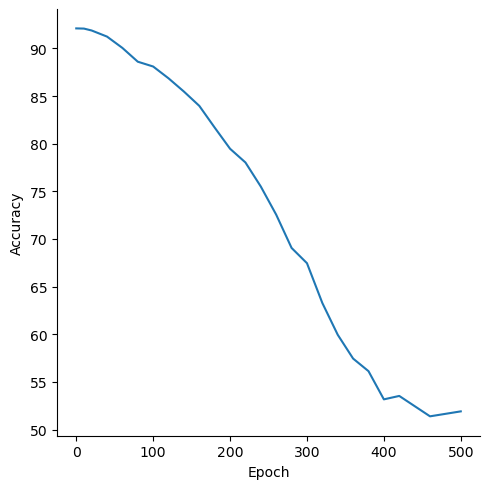

In [6]:
s = sns.relplot(
    data=df, kind="line",
    x="Epoch", y="Accuracy", 
    errorbar=None,
    dashes=False, markers=True,
)

In [7]:

params = {
    #"deficit_params" : {"deficit_duration":40}
    "deficit_params" : {"subset_size":0.1}
}
dirs = ["random_subset_AVG", "similarity_AVG", "disimilarity_AVG", "disimilarity"]
dirs = ["../deficit_removal/" + dir for dir in dirs]
exps_ids_sim = E.match_experiments(directories=dirs, params=params)

params = {}

#exp_ids = E.match_experiments(["WBN_Blur_6-5"], params=params)
exp_ids = E.match_experiments(["new_blur"], params=params)

In [8]:
all_exps = (exps_ids_sim[0] + exp_ids[0], exps_ids_sim[1] + exp_ids[1])

print(type(exps_ids_sim[0][0]))
print(all_exps)

all_exps = (exps_ids_sim + exp_ids)
print(all_exps)

<class 'str'>
(('KBH4tR5n', '../deficit_removal/random_subset_AVG', 'ysrD2WqJ', 'new_blur'), ('34Lhs6Oo', '../deficit_removal/random_subset_AVG', '11LMradl', 'new_blur'))
[('KBH4tR5n', '../deficit_removal/random_subset_AVG'), ('34Lhs6Oo', '../deficit_removal/random_subset_AVG'), ('ligb4VJN', '../deficit_removal/random_subset_AVG'), ('0RS35mMM', '../deficit_removal/random_subset_AVG'), ('7vFzRkx7', '../deficit_removal/random_subset_AVG'), ('XdITei9x', '../deficit_removal/random_subset_AVG'), ('rS3EebsB', '../deficit_removal/random_subset_AVG'), ('8K2uGKax', '../deficit_removal/random_subset_AVG'), ('nmZXzG9I', '../deficit_removal/random_subset_AVG'), ('C1baYRpv', '../deficit_removal/random_subset_AVG'), ('5BdoUqLe', '../deficit_removal/random_subset_AVG'), ('2SMWkjsz', '../deficit_removal/random_subset_AVG'), ('3YJLptHg', '../deficit_removal/random_subset_AVG'), ('KxrtjNLu', '../deficit_removal/random_subset_AVG'), ('rthx9uxs', '../deficit_removal/random_subset_AVG'), ('uF2okjkG', '../d

In [15]:

deficit_type = []
final_test_acc = []
deficit_end = []
training_duration = []
id = []

for exp_id, dir in all_exps:
    #id.append(exp_id)

    config = E.get_config(exp_id=exp_id, dir=dir)
    deficit_params = config["deficit_params"]

    _, _, _, test_accs = E.get_data(exp_id=exp_id, dir= dir)

    final_acc = test_accs[-1]

    if config['deficit_name'] == "SimilarityTypeDeficit" :
        deficit_type.append("10% " + deficit_params["type"])
    elif config['deficit_name'] == "CIFAR10SubsetDeficit" :
    #else :
        deficit_type.append("10% random")
    else :
        #continue
        deficit_type.append("blur")


    id.append(exp_id)

    
    deficit_end.append(deficit_params["end_epoch"])
    final_test_acc.append(final_acc)
    training_duration.append(config["num_epochs"])

#deficit_type = [ ("dissimilarity" if t == "disimilarity") for t in deficit_type]
for i, ty in enumerate(deficit_type):
    if ty == "10% disimilarity":
        deficit_type[i] = "10% dissimilarity"


df = pd.DataFrame({
    "Type" : deficit_type,
    "Accuracy" : final_test_acc,
    "Deficit Removal Epoch" : deficit_end,
    "Training Duration" : training_duration,
    "ID" : id,
                  })

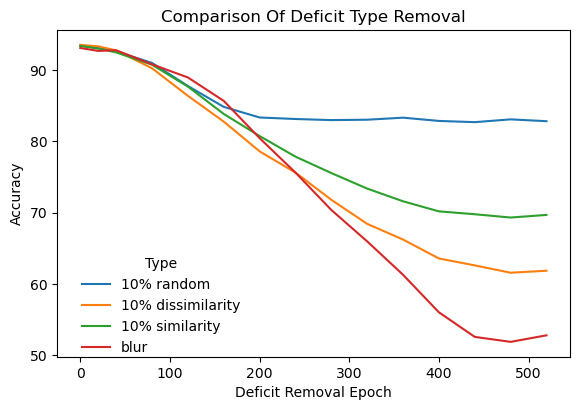

In [16]:
#plt.figure(figsize=(20, 5))   # width=12, height=5
s = sns.relplot(
    data=df, kind="line",
    x="Deficit Removal Epoch", y="Accuracy", hue="Type",
    hue_order=["10% random", "10% dissimilarity", "10% similarity", "blur"],
    errorbar=None,
    dashes=False, markers=True,
    #height=4, aspect=1.36
    height=4, aspect=1.5,
    #hue_order=["dissimilarity", "similarity", "blur", "random"]
)
s.ax.set_title("Comparison Of Deficit Type Removal")
sns.move_legend(s, "lower left", bbox_to_anchor=(0.12, 0.12))


for side in ["top", "right", "left", "bottom"]:
    s.ax.spines[side].set_visible(True)

#plt.legend(loc='lower left', bbox_to_anchor=(0, 0))